True shortest path cost: 9
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
Cost of path: 9
✅ Path is optimal


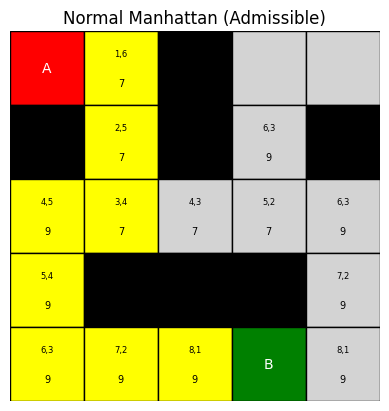

In [2]:
import heapq
import matplotlib.pyplot as plt
from collections import deque

# -----------------------
# Heuristic
# -----------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def heuristic_normal(a, b):
    return manhattan(a, b)

# -----------------------
# BFS (True shortest path)
# -----------------------
def bfs_shortest_path(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    q = deque([(start, 0)])
    visited = {start}
    parent = {start: None}
    while q:
        (r, c), d = q.popleft()
        if (r, c) == goal:
            path, node = [], (r, c)
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1], d
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r+dr, c+dc
            if 0<=nr<rows and 0<=nc<cols and maze[nr][nc]!=1 and (nr,nc) not in visited:
                visited.add((nr,nc))
                parent[(nr,nc)] = (r,c)
                q.append(((nr,nc), d+1))
    return None, float("inf")

# -----------------------
# A* Implementation
# -----------------------
def astar(maze, start, goal, heuristic_func):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (heuristic_func(start, goal), 0, start, [start]))
    visited = {}
    while open_set:
        f,g,current,path = heapq.heappop(open_set)
        if current in visited: continue
        visited[current] = (g, heuristic_func(current, goal))
        if current==goal: return path, g, visited
        r,c=current
        for dr,dc in [(1,0),(-1,0),(0,1),(0,-1)]:
            nr,nc=r+dr,c+dc
            if 0<=nr<rows and 0<=nc<cols and maze[nr][nc]!=1:
                if (nr,nc) not in visited:
                    h = heuristic_func((nr,nc),goal)
                    heapq.heappush(open_set,(g+1+h,g+1,(nr,nc),path+[(nr,nc)]))
    return None, float("inf"), visited

# -----------------------
# Visualization
# -----------------------
def draw_grid(maze,path,start,goal,visited,title=""):
    rows,cols=len(maze),len(maze[0])
    fig,ax=plt.subplots()
    for r in range(rows):
        for c in range(cols):
            rect=plt.Rectangle((c,rows-r-1),1,1,facecolor="lightgray",edgecolor="black")
            ax.add_patch(rect)
            if (r,c)==start:
                rect.set_facecolor("red"); ax.text(c+0.5,rows-r-0.5,"A",ha="center",va="center",color="white")
            elif (r,c)==goal:
                rect.set_facecolor("green"); ax.text(c+0.5,rows-r-0.5,"B",ha="center",va="center",color="white")
            elif maze[r][c]==1:
                rect.set_facecolor("black")
            elif (r,c) in path:
                rect.set_facecolor("yellow")
            if (r,c) in visited and (r,c) not in [start,goal]:
                g,h=visited[(r,c)]
                ax.text(c+0.5,rows-r-0.7,f"{int(g+h)}",ha="center",va="center",fontsize=7)
                ax.text(c+0.5,rows-r-0.3,f"{int(g)},{int(h)}",ha="center",va="center",fontsize=6)
    ax.set_xlim(0,cols); ax.set_ylim(0,rows); ax.set_aspect("equal"); plt.axis("off"); plt.title(title); plt.show()

# -----------------------
# Run Code
# -----------------------
maze = [
    ['A',0,1,0,0],
    [1,0,1,0,1],
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,0,0,'B',0]
]

start=goal=None
for r in range(len(maze)):
    for c in range(len(maze[0])):
        if maze[r][c]=='A': start=(r,c); maze[r][c]=0
        elif maze[r][c]=='B': goal=(r,c); maze[r][c]=0

true_path,true_cost=bfs_shortest_path(maze,start,goal)
print("True shortest path cost:",true_cost)

path,cost,visited=astar(maze,start,goal,heuristic_normal)
print("Path found:",path); print("Cost of path:",cost)
print("✅ Path is optimal" if cost==true_cost else "❌ Path not optimal")
draw_grid(maze,path,start,goal,visited,"Normal Manhattan (Admissible)")

True shortest path cost: 9

--- 1.5 × Manhattan ---
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 3)]
Cost of path: 9
✅ Path is optimal
⚠ Not admissible at (4, 4): h=1.5, h*=1
⚠ Not admissible at (4, 2): h=1.5, h*=1
⚠ Not admissible at (3, 4): h=3.0, h*=2
⚠ Not admissible at (4, 1): h=3.0, h*=2
⚠ Not admissible at (2, 4): h=4.5, h*=3
⚠ Not admissible at (4, 0): h=4.5, h*=3
⚠ Not admissible at (3, 0): h=6.0, h*=4
⚠ Not admissible at (2, 0): h=7.5, h*=5
⚠ Not admissible at (0, 4): h=7.5, h*=7
⚠ Not admissible at (1, 1): h=7.5, h*=7
⚠ Not admissible at (0, 1): h=9.0, h*=8
⚠ Not admissible at (0, 0): h=10.5, h*=9
❌ 1.5 × Manhattan is NOT admissible


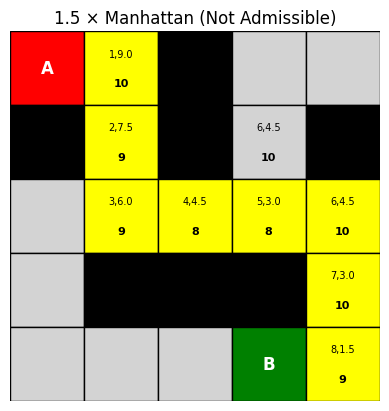

In [3]:
# astar_case2_scaled.py
import heapq
import matplotlib.pyplot as plt
from collections import deque

# -----------------------
# Heuristic (1.5 × Manhattan)
# -----------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def heuristic_case1(a, b):
    return 1.5 * manhattan(a, b)

# -----------------------
# BFS to get true shortest path cost
# -----------------------
def bfs_shortest_path(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    q = deque([(start, 0)])
    visited = {start}
    parent = {start: None}

    while q:
        (r, c), d = q.popleft()
        if (r, c) == goal:
            path = []
            node = (r, c)
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1], d
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] != 1 and (nr, nc) not in visited:
                visited.add((nr, nc))
                parent[(nr, nc)] = (r, c)
                q.append(((nr, nc), d+1))
    return None, float("inf")

# -----------------------
# A* with details
# -----------------------
def astar_with_details(maze, start, goal, heuristic_func):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (heuristic_func(start, goal), 0, start, [start]))
    visited = {}
    
    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited[current] = (g, heuristic_func(current, goal))
        
        if current == goal:
            return path, g, visited

        r, c = current
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] != 1:
                neighbor = (nr, nc)
                if neighbor not in visited:
                    h = heuristic_func(neighbor, goal)
                    heapq.heappush(open_set, (g + 1 + h, g + 1, neighbor, path + [neighbor]))
    return None, float("inf"), visited

# -----------------------
# Visualization
# -----------------------
def draw_grid(maze, path, start, goal, visited, title=""):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots()

    for r in range(rows):
        for c in range(cols):
            rect = plt.Rectangle((c, rows-r-1), 1, 1, facecolor="lightgray", edgecolor="black")
            ax.add_patch(rect)

            if (r, c) == start:
                rect.set_facecolor("red")
                ax.text(c+0.5, rows-r-0.5, "A", ha="center", va="center", color="white", fontsize=12, fontweight="bold")
            elif (r, c) == goal:
                rect.set_facecolor("green")
                ax.text(c+0.5, rows-r-0.5, "B", ha="center", va="center", color="white", fontsize=12, fontweight="bold")
            elif maze[r][c] == 1:
                rect.set_facecolor("black")
            elif (r, c) in path:
                rect.set_facecolor("yellow")
            
            # Add g,h,f values if visited
            if (r, c) in visited and (r, c) not in [start, goal]:
                g, h = visited[(r, c)]
                ax.text(c+0.5, rows-r-0.7, f"{int(g+h)}", ha="center", va="center", color="black", fontsize=8, fontweight="bold")
                ax.text(c+0.5, rows-r-0.3, f"{int(g)},{round(h,1)}", ha="center", va="center", color="black", fontsize=7)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_aspect("equal")
    plt.axis("off")
    plt.title(title)
    plt.show()

# -----------------------
# Admissibility Check
# -----------------------
def bfs_shortest_distances(maze, goal):
    rows, cols = len(maze), len(maze[0])
    dist = {goal: 0}
    q = deque([goal])

    while q:
        r, c = q.popleft()
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] != 1:
                if (nr, nc) not in dist:
                    dist[(nr, nc)] = dist[(r, c)] + 1
                    q.append((nr, nc))
    return dist

def check_admissibility(maze, goal, heuristic_func, label="Heuristic"):
    true_distances = bfs_shortest_distances(maze, goal)
    admissible = True
    for node, h_star in true_distances.items():
        h_val = heuristic_func(node, goal)
        if h_val > h_star:
            print(f"⚠ Not admissible at {node}: h={h_val}, h*={h_star}")
            admissible = False
    if admissible:
        print(f"✅ {label} is admissible")
    else:
        print(f"❌ {label} is NOT admissible")

# -----------------------
# Example Maze
# -----------------------
maze = [
    [ 'A', 0,   1,  0,  0 ],
    [  1 , 0,   1,  0,  1 ],
    [  0 , 0,   0,  0,  0 ],
    [  0 , 1,   1,  1,  0 ],
    [  0 , 0,   0, 'B', 0 ]
]

# Convert A, B into 0 and store start, goal
start, goal = None, None
for r in range(len(maze)):
    for c in range(len(maze[0])):
        if maze[r][c] == 'A':
            start = (r, c)
            maze[r][c] = 0
        elif maze[r][c] == 'B':
            goal = (r, c)
            maze[r][c] = 0

# Compute true shortest path
true_path, true_cost = bfs_shortest_path(maze, start, goal)
print("True shortest path cost:", true_cost)

# -----------------------
# Run Case 2: 1.5 × Manhattan
# -----------------------
print("\n--- 1.5 × Manhattan ---")
path, cost, visited = astar_with_details(maze, start, goal, heuristic_case1)
print("Path found:", path)
print("Cost of path:", cost)
if path is not None:
    if cost == true_cost:
        print("✅ Path is optimal")
    else:
        print("❌ Path is NOT optimal")
check_admissibility(maze, goal, heuristic_case1, "1.5 × Manhattan")
draw_grid(maze, path if path else [], start, goal, visited, title="1.5 × Manhattan (Not Admissible)")

True shortest path cost: 9
⚠ Consistency fails: h((0, 0))=12 > cost((0, 0)->(0, 1)) + h((0, 1))=7

--- Inconsistent Heuristic ---
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
Cost of path: 9
✅ Path is optimal (but heuristic is inconsistent)


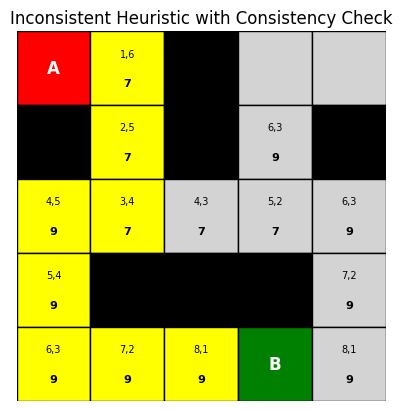

In [4]:
import heapq
import matplotlib.pyplot as plt
from collections import deque

# -----------------------
# Heuristic (Inconsistent)
# -----------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def heuristic_inconsistent(a, b, start=None):
    """Inconsistent heuristic: add bias at the start"""
    h = manhattan(a, b)
    if start and a == start:
        h += 5   # deliberate violation of consistency
    return h

# -----------------------
# BFS to compute true shortest path
# -----------------------
def bfs_shortest_path(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    q = deque([(start, 0)])
    visited = {start}
    parent = {start: None}

    while q:
        (r, c), d = q.popleft()
        if (r, c) == goal:
            path = []
            node = (r, c)
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1], d
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] != 1 and (nr, nc) not in visited:
                visited.add((nr, nc))
                parent[(nr, nc)] = (r, c)
                q.append(((nr, nc), d+1))
    return None, float("inf")

# -----------------------
# A* with Consistency Check
# -----------------------
def astar_with_consistency_check(maze, start, goal, heuristic_func):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (heuristic_func(start, goal, start), 0, start, [start]))
    visited = {}
    
    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited[current] = (g, heuristic_func(current, goal, start))
        
        if current == goal:
            return path, g, visited

        r, c = current
        h_current = heuristic_func(current, goal, start)

        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] != 1:
                neighbor = (nr, nc)
                h_neighbor = heuristic_func(neighbor, goal, start)
                
                # ---------- Consistency Check ----------
                if h_current > 1 + h_neighbor:
                    print(f"⚠ Consistency fails: h({current})={h_current} > cost({current}->{neighbor}) + h({neighbor})={1+h_neighbor}")
                
                if neighbor not in visited:
                    heapq.heappush(open_set, (g + 1 + h_neighbor, g + 1, neighbor, path + [neighbor]))
                    
    return None, float("inf"), visited

# -----------------------
# Visualization
# -----------------------
def draw_grid(maze, path, start, goal, visited, title=""):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots()

    for r in range(rows):
        for c in range(cols):
            rect = plt.Rectangle((c, rows-r-1), 1, 1, facecolor="lightgray", edgecolor="black")
            ax.add_patch(rect)

            if (r, c) == start:
                rect.set_facecolor("red")
                ax.text(c+0.5, rows-r-0.5, "A", ha="center", va="center", color="white", fontsize=12, fontweight="bold")
            elif (r, c) == goal:
                rect.set_facecolor("green")
                ax.text(c+0.5, rows-r-0.5, "B", ha="center", va="center", color="white", fontsize=12, fontweight="bold")
            elif maze[r][c] == 1:
                rect.set_facecolor("black")
            elif (r, c) in path:
                rect.set_facecolor("yellow")
            
            # Add g,h values if visited
            if (r, c) in visited and (r, c) not in [start, goal]:
                g, h = visited[(r, c)]
                ax.text(c+0.5, rows-r-0.7, f"{int(g+h)}", ha="center", va="center", color="black", fontsize=8, fontweight="bold")
                ax.text(c+0.5, rows-r-0.3, f"{int(g)},{int(h)}", ha="center", va="center", color="black", fontsize=7)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_aspect("equal")
    plt.axis("off")
    plt.title(title)
    plt.show()

# -----------------------
# Example Maze
# -----------------------
maze = [
    [ 'A', 0,   1,  0,  0 ],
    [  1 , 0,   1,  0,  1 ],
    [  0 , 0,   0,  0,  0 ],
    [  0 , 1,   1,  1,  0 ],
    [  0 , 0,   0, 'B', 0 ]
]

# Convert A, B into 0 and store start, goal
start, goal = None, None
for r in range(len(maze)):
    for c in range(len(maze[0])):
        if maze[r][c] == 'A':
            start = (r, c)
            maze[r][c] = 0
        elif maze[r][c] == 'B':
            goal = (r, c)
            maze[r][c] = 0

# True shortest path
true_path, true_cost = bfs_shortest_path(maze, start, goal)
print("True shortest path cost:", true_cost)

# Run A* with inconsistent heuristic and consistency check
path, cost, visited = astar_with_consistency_check(maze, start, goal, heuristic_inconsistent)
print("\n--- Inconsistent Heuristic ---")
print("Path found:", path)
print("Cost of path:", cost)
if path is not None:
    if cost == true_cost:
        print("✅ Path is optimal (but heuristic is inconsistent)")
    else:
        print("❌ Path is NOT optimal (due to inconsistency)")

# Draw the grid with visited nodes and path
draw_grid(maze, path if path else [], start, goal, visited, title="Inconsistent Heuristic with Consistency Check")